# Condition number demo

## Jupyter basics

First some basics about the Jupyter notebook system. Jupyter notebooks have three types of cells
  * text cells
  * code cells
  * output cells
  

### Text cell

This is a text cell in Markdown mark-up language. Double-click on this text to show/edit the Markdown code, and then hit shift-enter to process the Markdown and display the formatted text. 

Simple Markdown examples: **boldface text**, *italic text*, `code text`, inline LaTeX $f(x) = ax^2 + bx + c$.

An offset LaTeX equation 
\begin{align}
\int_{-\infty}^{\infty} e^{-x^2} \, dx = \sqrt{\pi}
\end{align}

### Code cell with output

Next is a code cell. Hit shift-enter to execute the code. To type a $\pi$ symbol in the code cell, type `\pi` and then hit the tab button. 

The output of a code cell is the value of the last executed expression, in this case,
a plot.

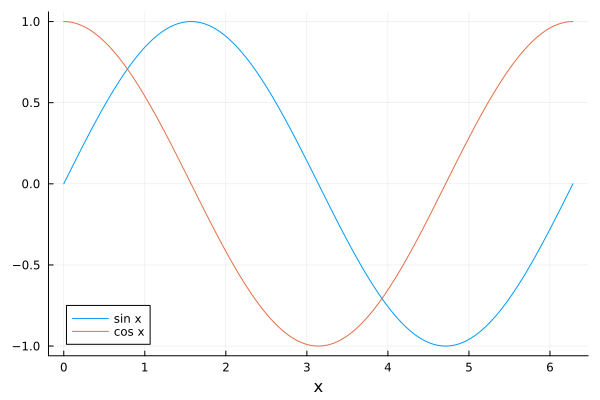

In [1]:
using Plots

x = range(0,2π, 200)
plot(x, sin.(x), label="sin x")
plot!(x, cos.(x), label="cos x")
plot!(xlabel="x")

In [2]:
savefig("trigfuncs.png")

"/home/gibson/professional/teaching/2025-06/961/notebooks/trigfuncs.png"

## The condition number of matrix-vector multiplication

The condition number $\kappa_x$ of a function $f(x)$ is 

\begin{align*}
\kappa_x = \sup_{\delta x\neq0} \frac{\|f(x+\delta x) - f(x)\|/\|f(x)\|}{\|\delta x\|/\|x\|}
\end{align*}

For matrix-vector multiplication, $f(x) = Ax$, this reduces to

\begin{align*}
\kappa_x = \sup_{\delta x\neq0} \frac{\|A \delta x \|/\|Ax\|}{\| \delta x\|/\|x\|}
\end{align*}

or equivalently,


\begin{align*}
\kappa_x = \sup_{\delta x\neq0} \frac{\|A \delta x \|/\|\delta x\|}{\| Ax\|/\|x\|}
\end{align*}

Recall that $\kappa_x$ is bounded above by the condition number of the matrix $\kappa(A) = \sigma_1/\sigma_m$,
where $\sigma_1$ and $\sigma_m$ are the largest and smallest singular values of $A$.

\begin{align*}
\kappa_x = \sup_{\delta x\neq0} \frac{\|A \delta x \|/\|\delta x\|}{\| Ax\|/\|x\|} \leq \kappa(A) = \frac{\sigma_1}{\sigma_m}
\end{align*}

The following code demonstrates this bound by calculating $\|A \delta x \|/\|\delta x\|\, / \, \| Ax\|/\|x\|$
for a large set of random vectors $x$ and $\delta x$, and showing that this quantity is always less than  $\kappa(A)$.

In [3]:
using LinearAlgebra

m = 3      # size of matrix, m x m
n = 4
κ = 1e04   # condition number

# construct a random m x m matrix A with the given condition number
U,tmp = qr(randn(m,m))
V,tmp = qr(randn(m,m))
c = κ^(-1/(m-1))
σ = c.^((1:m) .- m/2)

A = U*diagm(σ)*V'

κA = cond(A)

9999.999999999445

In [4]:
A

3×3 Matrix{Float64}:
  0.427337    -6.43663    0.624553
 -0.00527506   0.330918  -0.0325131
 -0.651693     7.54681   -0.719326

In [5]:
# calculate the ratio for a large number of random x and dx

ϵ = 1e-05     # (not really necessary since f(x)=Ax is linear) 
N = 1000
ratio = zeros(N)

for n=1:N
    x = randn(m)
    dx = ϵ*randn(m)
    ratio[n] = (norm(A*dx)/norm(dx))/(norm(A*x)/norm(x))
end

@show κA = cond(A)
@show maximum(ratio)

κA = cond(A) = 9999.999999999445
maximum(ratio) = 104.03054873157869


104.03054873157869

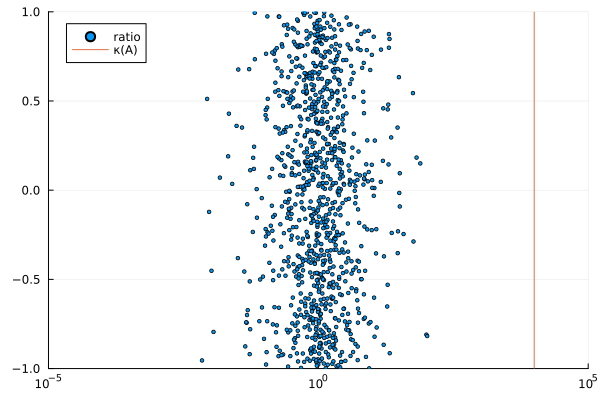

In [6]:
# make a scatter plot of the ratio compared to the upper bound κ(A)
# plot the value of the ratio on the x coordinate with a random y value 
# in order to spread the points out and make their density more apparent

n = Int(round(log10(κ))) + 1
scatter(ratio, 2*rand(N).-1, markersize=2, label="ratio") 
plot!([κA; κA], [-1;1], label="κ(A)")
plot!(xaxis=:log, xlim=(10.0^-n, 10.0^n), ylim=(-1,1), legend=:topleft)

## The condition number of Ax=b solve

Similarly, the condition number $\kappa_b$ for $Ax=b$ solve is

\begin{align*}
\kappa_b = \sup_{\delta b\neq0} \frac{\|A^{-1} \delta b \|/\|A^{-1}b\|}{\| \delta b\|/\|b\|}.
\end{align*}

This is obtained by substituting $f(b) = A^{-1}b$ into the general formula 
for the condition number of a function $f(x)$. 

Now calculate a large number of such ratios over random $b, \delta b$. I'll use
$A\backslash b$ to solve $Ax=b$ rather than computing $A^{-1}$ and then the product $A^{-1}b$, out of good numerical taste.

In [8]:
ϵ = 1e-05         # (not really necessary since f(b) = A⁻¹ b is linear) 
N = 1000
ratio = zeros(N)

for n=1:N
    b = randn(m)
    db = ϵ*randn(m)
    ratio[n] = (norm(A\db)/norm(db))/(norm(A\b)/norm(b))
end

@show κA = cond(A)
@show maximum(ratio)

κA = cond(A) = 9999.999999999445
maximum(ratio) = 116.14147512045776


116.14147512045776

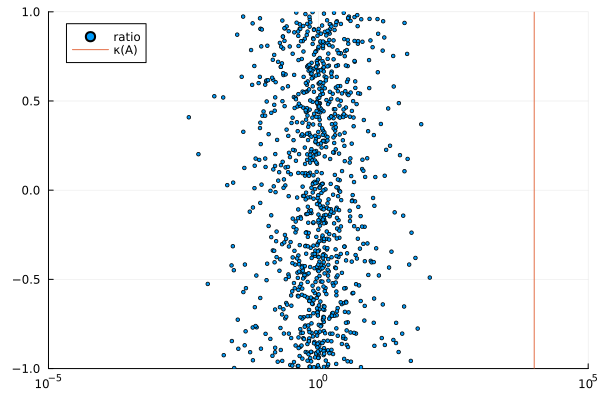

In [9]:
# make a scatter plot of the ratio compared to the upper bound κ(A)
# plot the value of the ratio on the x coordinate with a random y value 
# in order to spread the points out and make their density more apparent

n = Int(round(log10(κ))) + 1
scatter(ratio, 2*rand(N).-1, markersize=2, label="ratio") 
plot!([κA; κA], [-1;1], label="κ(A)")
plot!(xaxis=:log, xlim=(10.0^-n, 10.0^n), ylim=(-1,1), legend=:topleft)

## What $x,\delta x$ and $b, \delta b$ achieve the upper bound?

I won't tell you, since it's a homework problem, but I will demonstrate existence!

In [10]:
include("secretsauce.jl")

x, dx = matvecmult_maximizers(A)
 
b, db = Axbsolve_maximizers(A)

@show cond(A)
@show (norm(A*dx)/norm(dx))/(norm(A*x)/norm(x))
@show (norm(A\db)/norm(db))/(norm(A\b)/norm(b))


cond(A) = 9999.999999999445
(norm(A * dx) / norm(dx)) / (norm(A * x) / norm(x)) = 9999.999999999573
(norm(A \ db) / norm(db)) / (norm(A \ b) / norm(b)) = 9999.999999999645


9999.999999999645

In [11]:
x

3-element Vector{Float64}:
 0.08312038938908732
 0.10168163207643129
 0.9913384117273374

In [12]:
dx

3-element Vector{Float64}:
 -0.0772966702734372
  0.9924416948089176
 -0.09531373022520462

In [13]:
b

3-element Vector{Float64}:
 -0.6480544027530281
  0.03319231542478231
  0.7608703971565443

In [14]:
db

3-element Vector{Float64}:
 0.17670197081559655
 0.9783407793903521
 0.10782269191484067